In [1]:

# load your data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Acces to the folder 
FolderName = 'Colab Notebooks'
path_config_file = '/content/drive/My Drive/'+FolderName+'/AUDITION_2000ms/'
path_config_file

'/content/drive/My Drive/Colab Notebooks/AUDITION_2000ms/'

In [3]:
# visualize a few raw datapoints to get an idea about your "raw" data
# The libraries needed
import os
import scipy.io as sio
from os.path import dirname, join as pjoin
import numpy as np

# list all the files that are part of the dataset
all_filenames = os.listdir(path_config_file)
#all_mats = [i for i in os.listdir(path_config_file) if 'mat' in i]

# load the time-series data in each data file
all_mats = [sio.loadmat(pjoin(path_config_file,mat)) for mat in all_filenames]

# data contains 2595 points, remember that each iteration has 519 points

In [4]:
# Stimuli by iteration = file number, we get a 3D array
s_IT1 = all_mats[0]['Sr']
s_IT2 = all_mats[1]['Sr']
s_IT3 = all_mats[2]['Sr']
s_IT4 = all_mats[3]['Sr']
s_IT5 = all_mats[4]['Sr']

# Responses by iteration = file number
r_IT1 = all_mats[0]['Rr']
r_IT2 = all_mats[1]['Rr']
r_IT3 = all_mats[2]['Rr']
r_IT4 = all_mats[3]['Rr']
r_IT5 = all_mats[4]['Rr']

# Parameters of data
DUR = 2000
BEATS = 3
REP = 5
PTS = BEATS*REP+1
TRY_DUR = DUR*(REP+1)
nb_pts = s_IT5.shape[0]
IT = 5
pts4it = [num*nb_pts for num in range(IT)]

# PRE-PROCESSIG OF DATA
# Stims

finding0 = [idx for idx,data in enumerate(r_IT1) if len(r_IT1[idx][0][0]) < 14]
#print(finding0)

# delete all the empty or nan rows
nw_sIT1 = np.delete(s_IT1,finding0,0)
nw_sIT2 = np.delete(s_IT2,finding0,0)
nw_sIT3 = np.delete(s_IT3,finding0,0)
nw_sIT4 = np.delete(s_IT4,finding0,0)
nw_sIT5 = np.delete(s_IT5,finding0,0)

# Get only 1D array
sIT1 = [nw_sIT1[i][0][0] for i in range(nw_sIT1.shape[0])]
sIT2 = [nw_sIT2[i][0][0] for i in range(nw_sIT1.shape[0])]
sIT3 = [nw_sIT3[i][0][0] for i in range(nw_sIT1.shape[0])]
sIT4 = [nw_sIT4[i][0][0] for i in range(nw_sIT1.shape[0])]
sIT5 = [nw_sIT5[i][0][0] for i in range(nw_sIT1.shape[0])]

# Responses

# delete all the empty or nan rows
nw_rIT1 = np.delete(r_IT1,finding0,0)
nw_rIT2 = np.delete(r_IT2,finding0,0)
nw_rIT3 = np.delete(r_IT3,finding0,0)
nw_rIT4 = np.delete(r_IT4,finding0,0)
nw_rIT5 = np.delete(r_IT5,finding0,0)
# Get only 1D array
rIT1 = [nw_rIT1[i][0][0] for i in range(nw_sIT1.shape[0])]
rIT2 = [nw_rIT2[i][0][0] for i in range(nw_sIT1.shape[0])]
rIT3 = [nw_rIT3[i][0][0] for i in range(nw_sIT1.shape[0])]
rIT4 = [nw_rIT4[i][0][0] for i in range(nw_sIT1.shape[0])]
rIT5 = [nw_rIT5[i][0][0] for i in range(nw_sIT1.shape[0])]


Text(0.5, 0, 'Time (in sec)')

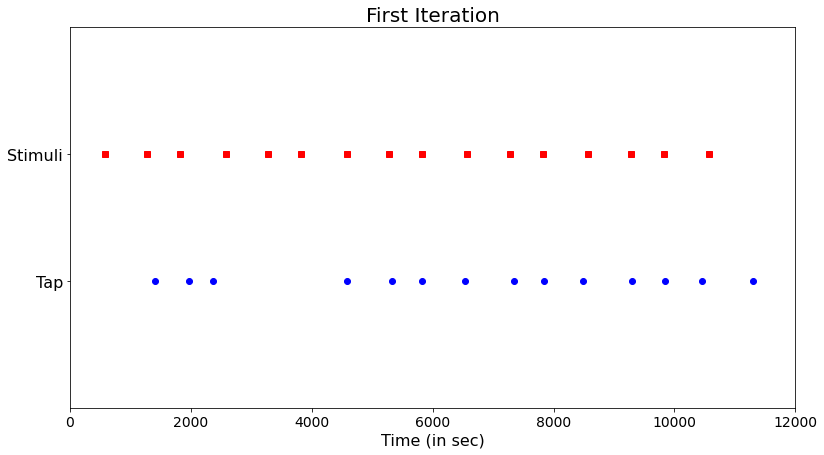

In [5]:
import matplotlib.pyplot as plt

ex_s = np.reshape(np.array(sIT1[0]),(1,PTS))
ex_r = np.array(rIT1[0])
ex_r = np.reshape(ex_r,(1,ex_r.shape[0]))

#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 2.7))
y_stm = np.ones((1,PTS), dtype=int)*2
y_tap = np.ones((1,ex_r.shape[0]), dtype=int)
plt.figure(figsize=(13,7))
plt.plot(ex_s,y_stm,'s',color='red',label='Simuli')
plt.plot(ex_r,y_tap,'o',color='blue',label='Tap')
plt.axis([0,TRY_DUR,0,3])
plt.xticks(fontsize=14)
plt.yticks([1,2],['Tap','Stimuli'],fontsize=16)
plt.title('First Iteration',fontsize=20)
plt.xlabel('Time (in sec)',fontsize=16)
# what are the units in the plot you are showing us?

In [ ]:
# visualize the labels of your dataset (could be as simple as a table)
from tabulate import tabulate
mylabels = np.array([111,112,113,121,122,123,131,132,
          211,212,213,221,223,231,232,233,
          311,312,321,322,323,332])

mydata = [["111"],["112"],["113"],["121"],["122"],["123"],["131"],["132"],
          ["211"],["212"],["213"],["221"],["223"], ["231"],["232"],["233"],
          ["311"],["312"],["321"],["322"],["323"],["332"]
]
# create header
head = ["Integer Ratio Rhythms"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

# how many labels are there available per each datapoint?
# how are the different labels useful/needed?

+-------------------------+
|   Integer Ratio Rhythms |
+=========================+
|                     111 |
+-------------------------+
|                     112 |
+-------------------------+
|                     113 |
+-------------------------+
|                     121 |
+-------------------------+
|                     122 |
+-------------------------+
|                     123 |
+-------------------------+
|                     131 |
+-------------------------+
|                     132 |
+-------------------------+
|                     211 |
+-------------------------+
|                     212 |
+-------------------------+
|                     213 |
+-------------------------+
|                     221 |
+-------------------------+
|                     223 |
+-------------------------+
|                     231 |
+-------------------------+
|                     232 |
+-------------------------+
|                     233 |
+-------------------------+
|                   

[[ 784.  598.  618. ...  784.  598.  618.]
 [ 475.  544.  981. ...  475.  544.  981.]
 [ 969.  680.  351. ...  969.  680.  351.]
 ...
 [1097.  420.  483. ... 1097.  420.  483.]
 [ 574.  543.  883. ...  574.  542.  884.]
 [ 513.  606.  881. ...  513.  606.  881.]]


Text(0.5, 0, 'Time (in sec)')

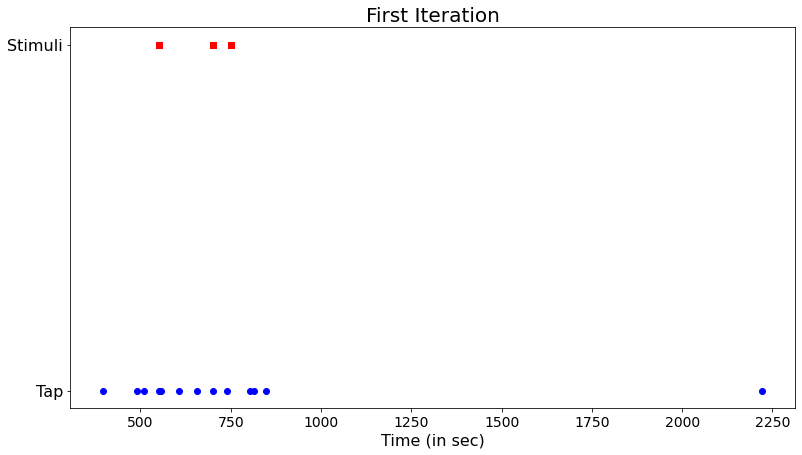

In [53]:
# pre-process the data (as needed before you can show it to your model).
intervals_sIT1 = np.diff(np.array(sIT1),axis=1)
intervals_rIT1 = np.diff(np.array(rIT1[0]))
intervals_sIT5 = np.diff(np.array(sIT5),axis=1)
intervals_rIT5 = np.diff(np.array(rIT5[0]))
print(intervals_sIT5)
N_INT = PTS-1
# plot a few datapoints in your pre-processed data. 
n_int_s = np.ones((1,PTS-1), dtype=int)
y_tap = np.ones((intervals_rIT1.shape[0],1), dtype=int)
plt.figure(figsize=(13,7))
plt.plot(intervals_sIT1[0],y_stm,'s',color='red',label='Simuli')
plt.plot(intervals_rIT1,y_tap,'o',color='blue',label='Tap')
#plt.axis([0,TRY_DUR,0,3])
plt.xticks(fontsize=14)
plt.yticks([1,2],['Tap','Stimuli'],fontsize=16)
plt.title('First Iteration',fontsize=20)
plt.xlabel('Time (in sec)',fontsize=16)


# what's different between the plots of "raw" data and "pre-processed" data?
# how do these differences make it easier for the model to learn from your data?

In [45]:
print(np.diff(np.array(rIT1[0])))

[ 552.  396. 2222.  740.  509.  700.  815.  489.  657.  802.  557.  608.
  848.]


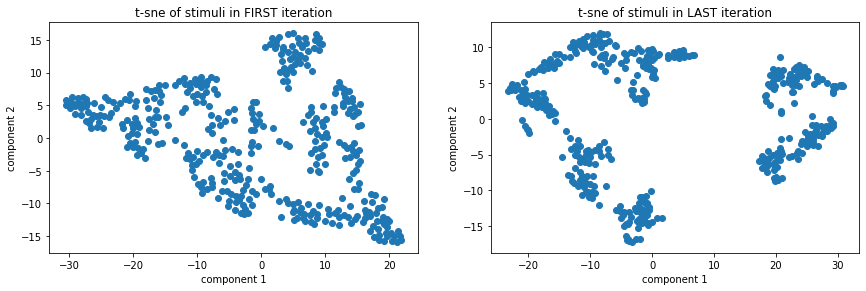

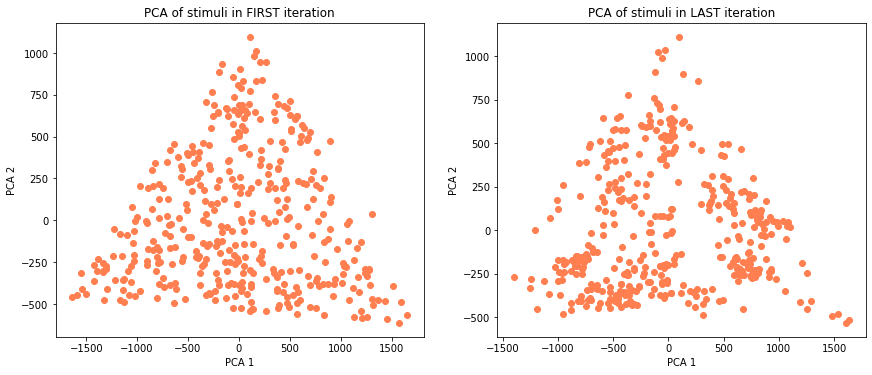

In [55]:
# plot ALL of your training data using t-SNE and PCA (must plot both)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# STIMULI
# t-sne plotting
X_embedded1 = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(np.array(sIT1))

plt.subplot(121)
plt.scatter(X_embedded1[:, 0], X_embedded1[:, 1])
plt.title('t-sne of stimuli in FIRST iteration')
plt.xlabel('component 1')
plt.ylabel('component 2')

X_embedded5 = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(np.array(sIT5))

plt.subplot(122)
plt.scatter(X_embedded5[:, 0], X_embedded5[:, 1])
plt.title('t-sne of stimuli in LAST iteration')
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
# ax = plt.gca()
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)

plt.show()


pca = PCA(n_components=2)
IT1_pca = pca.fit_transform(sIT1)
IT5_pca = pca.fit_transform(sIT5)

plt.subplot(221)
plt.scatter(IT1_pca[:,0],IT1_pca[:,1],c='coral')
plt.title('PCA of stimuli in FIRST iteration')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(222)
plt.scatter(IT5_pca[:,0],IT5_pca[:,1],c='coral')
plt.title('PCA of stimuli in LAST iteration')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplots_adjust(bottom=0.1, right=2, top=2.5)
plt.show()

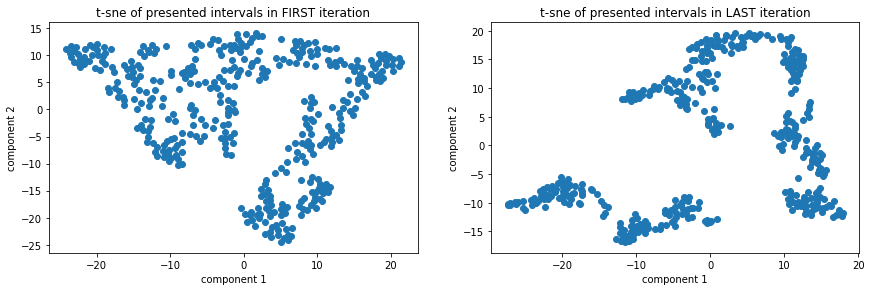

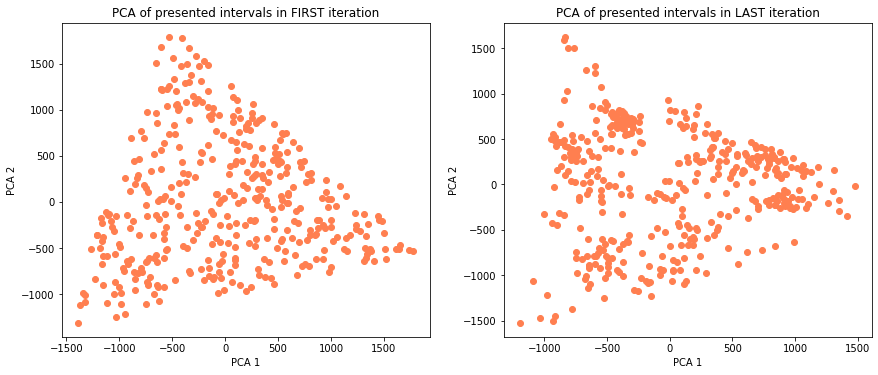

In [57]:
# plot ALL of your training data using t-SNE and PCA (must plot both)
# INTERVALS FOR STIMS
# t-sne plotting
X_emb_int1 = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(intervals_sIT1)
X_emb_int5 = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(intervals_sIT5)

plt.subplot(121)
plt.scatter(X_emb_int1[:, 0], X_emb_int1[:, 1])
plt.title('t-sne of presented intervals in FIRST iteration')
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.subplot(122)
plt.scatter(X_emb_int5[:, 0], X_emb_int5[:, 1])
plt.title('t-sne of presented intervals in LAST iteration')
plt.xlabel('component 1')
plt.ylabel('component 2')
# ax = plt.gca()
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.show()


pca = PCA(n_components=2)
IT1_inter_pca = pca.fit_transform(intervals_sIT1)
IT5_inter_pca = pca.fit_transform(intervals_sIT5)

plt.subplot(221)
plt.scatter(IT1_inter_pca[:,0],IT1_inter_pca[:,1],c='coral')
plt.title('PCA of presented intervals in FIRST iteration')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(222)
plt.scatter(IT5_inter_pca[:,0],IT5_inter_pca[:,1],c='coral')
plt.title('PCA of presented intervals in LAST iteration')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplots_adjust(bottom=0.1, right=2, top=2.5)
plt.show()

In [ ]:
# create a NEW visualization of your dataset that is different from 
# the above instructions (be creative!). You can do more than 1 if you want.

In [ ]:
#############
# IMPORTANT #
#############
# IMPORTANT: all figures that you produce in this notebook must be produced 100% with python. 
# (do not use other software like keynote, excell, powepoint, photoshop, illustrator, etc)

# when you are done, create a post on our course subreddit with ALL your data visualizations (save plots or take screenshots)
# make sure the title of the post is the title of your dataset. In a comment tell us about the data you used.
# your subreddit post must have at least 6 different plots.

# to get full credit, your plots must "make perfect sense". This means that 
# all axes should be properly labeled (with units), titled, and must include legends.

# Finally, create a github repository for your project and upload your visualization
# code and plots there. 

# send the instructor an email with the link to your github repository. 